**2. Vector Space Analysis**
- Generate two vectors representing pixels of distinct images $(\(v_1, v_2 \in \mathbb{R}^{784}\))$.
- Verify if the vectors are linearly independent by calculating their determinant (or using tools such as orthogonality and basis).
- Test vector addition and verify if the result also belongs to the image space.

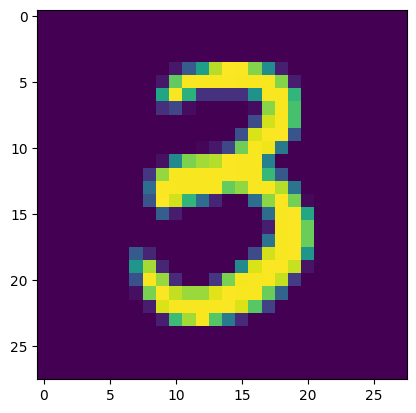

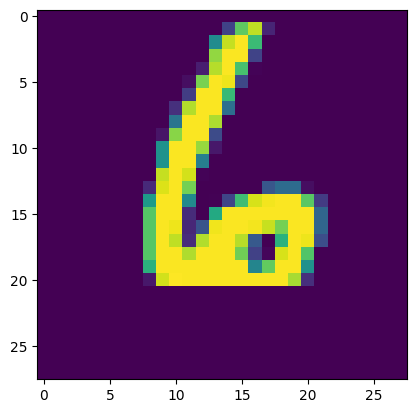

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

MNIST_path = '../MNIST_data'

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(MNIST_path, train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

# get some random training images and their labels, when we use next dataiter it returns the next batch ( we defined as 64 imagens )
dataiter = iter(train_loader)
images, labels = next(dataiter)

img1 = images[0].numpy()
img1 = np.transpose(img1, (1, 2, 0))

img2 = images[1].numpy()
img2 = np.transpose(img2, (1, 2, 0))

plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

# To verify if the vectors are linearly independent we could calculate set the determinant of the matrix $A = [v_1, v_2]$. But in this case this results in a 784x2 matrix, so we can check matrix rank, if the rank is 2 then the vectors are linearly independent.

In [20]:
# vectorize the images
v1 = np.reshape(img1, (784, 1))
v2 = np.reshape(img2, (784, 1))

A = np.column_stack((v1, v2))

# Calcular o rank da matriz
rank = np.linalg.matrix_rank(A)

print(f"Matrix rank: {rank}")

Matrix rank: 2


# To test vector addition and verify if the result also belongs to the image space, we could check if the resulting vector is in the image space.

In [23]:
import numpy as np

# sum vectors to obtain v3
v3 = v1 + v2

A = np.column_stack((v1, v2))

# solve linear system A * x = v3
solution, residuals, rank, s = np.linalg.lstsq(A, v3, rcond=None)

# Verificar se há uma solução exata
if np.allclose(A @ solution, v3):
    print("O vetor v3 pertence ao subespaço gerado por v1 e v2.")
else:
    print("O vetor v3 NÃO pertence ao subespaço gerado por v1 e v2.")

O vetor v3 pertence ao subespaço gerado por v1 e v2.


In [24]:
print(s)

[33.488068 24.652693]
